In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt


In [4]:
dataset=pd.read_csv('./TCS_final_2010-21_Daily.csv')


In [5]:
dataset.head()

,Date,DateValue,Open,High,Low,Close,Adj Close,Volume
0,2010-01-04,40182,377.399994,379.450012,374.524994,375.825012,302.451019,1963682.0
1,2010-01-05,40183,377.500000,379.774994,373.274994,375.924988,302.531525,2014488.0
2,2010-01-06,40184,375.924988,376.100006,366.500000,367.424988,295.690979,3349176.0
3,2010-01-07,40185,367.750000,369.700012,355.500000,357.200012,287.462311,6474892.0
4,2010-01-08,40186,358.000000,359.250000,348.250000,349.899994,281.587463,6048178.0


In [6]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [7]:
dataset.shape

(2751, 8)

In [10]:
# dataset.drop('Adj Close',axis = 1, inplace = True)
dataset.drop('DateValue',axis = 1, inplace = True)

In [11]:
dataset.head()

,Date,Open,High,Low,Close,Volume
0,2010-01-04,377.399994,379.450012,374.524994,375.825012,1963682.0
1,2010-01-05,377.500000,379.774994,373.274994,375.924988,2014488.0
2,2010-01-06,375.924988,376.100006,366.500000,367.424988,3349176.0
3,2010-01-07,367.750000,369.700012,355.500000,357.200012,6474892.0
4,2010-01-08,358.000000,359.250000,348.250000,349.899994,6048178.0


In [12]:
dataset.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [13]:
dataset.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [14]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2751 entries, 0 to 2750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2751 non-null   datetime64[ns]
 1   Open    2751 non-null   float64       
 2   High    2751 non-null   float64       
 3   Low     2751 non-null   float64       
 4   Close   2751 non-null   float64       
 5   Volume  2751 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 129.1 KB


In [15]:
dataset.describe()

,Open,High,Low,Close,Volume
count,2751.000000,2751.000000,2751.000000,2751.000000,2.751000e+03
mean,1256.284841,1270.140219,1241.625939,1255.768349,2.903509e+06
std,641.777959,648.474233,634.099285,640.998765,2.424003e+06
min,352.000000,357.000000,342.625000,349.774994,8.682200e+04
25%,645.049988,651.600006,639.299988,644.787476,1.774601e+06
50%,1217.449951,1227.525024,1206.099976,1216.699951,2.429205e+06
75%,1725.487488,1750.950012,1703.500000,1725.687500,3.433938e+06
max,3308.949951,3339.800049,3278.649902,3308.800049,8.806715e+07


In [16]:
print(len(dataset))

2751


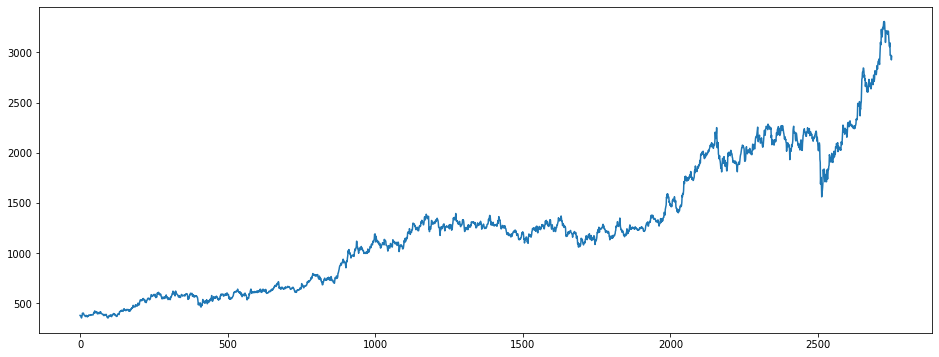

In [17]:
dataset['Open'].plot(figsize=(16,6))

In [18]:

X  = dataset[['Open','High','Low','Volume']]
y = dataset['Close']

In [19]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [20]:
X_train.shape

(2063, 4)

In [21]:
X_test.shape

(688, 4)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [23]:
regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
print(regressor.coef_)

[-4.74595959e-01  8.12123341e-01  6.60679383e-01 -2.23520165e-07]


In [25]:
print(regressor.intercept_)

0.9176639072134094


In [26]:
predicted=regressor.predict(X_test)

In [27]:
print(X_test)

         Open         High          Low     Volume
764    672.00   676.000000   671.075012  1484540.0
2402  2080.00  2094.500000  2041.000000  2177916.0
396    565.25   567.000000   561.125000  2025292.0
2325  2264.00  2285.000000  2243.050049  3320916.0
2203  1970.00  2010.000000  1961.000000  2942014.0
...       ...          ...          ...        ...
1962  1268.50  1294.474976  1247.175049  2180664.0
1544  1216.50  1258.500000  1206.500000  2400648.0
1256  1276.50  1297.400024  1275.425049  2136416.0
1768  1251.00  1260.000000  1246.099976  1791510.0
878    840.00   846.150024   822.000000  3445532.0

[688 rows x 4 columns]


In [28]:
predicted.shape

(688,)

In [29]:
dframe=pd.DataFrame(y_test,predicted)

In [30]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [31]:
print(dfr)

           Actual    Predicted
764    674.049988   674.018158
2402  2047.699951  2062.710219
396    565.325012   563.397258
2325  2254.100098  2263.328877
2203  2000.000000  1993.266210
...           ...          ...
1962  1290.250000  1273.661452
1544  1253.324951  1242.201987
1256  1287.875000  1290.914267
1768  1256.099976  1253.345653
878    830.200012   831.743550

[688 rows x 2 columns]


In [32]:
dfr.head(25)

,Actual,Predicted
764,674.049988,674.018158
2402,2047.699951,2062.710219
396,565.325012,563.397258
2325,2254.100098,2263.328877
2203,2000.000000,1993.266210
248,585.099976,584.329948
1455,1180.949951,1184.083552
195,496.424988,491.529816
2204,2016.800049,2004.236393
654,649.325012,648.528698


In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [34]:
regressor.score(X_test,y_test)

0.999798522577585

In [35]:
import math

In [36]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 6.029678664432719


In [37]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 84.29169386079361


In [38]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 9.181050803736662


In [39]:
graph=dfr.head(20)

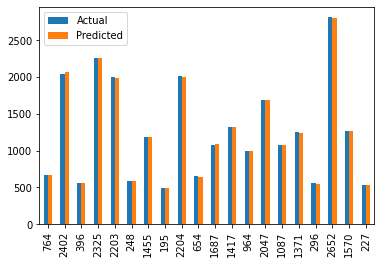

In [40]:
graph.plot(kind='bar')